In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"./data.csv", encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df_country = df[['Country','CustomerID']].drop_duplicates()
df_country.groupby(['Country'])['CustomerID'].agg('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [5]:
df = df[df['Country']=='United Kingdom'].reset_index(drop=True)
print(df['Country'].unique())

['United Kingdom']


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [7]:
df = df[pd.notnull(df['CustomerID'])]
print(df.Quantity.min())
print(df.UnitPrice.min())

-80995
0.0


In [8]:
df = df[df['Quantity']>0]

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [11]:
df.shape

(354345, 9)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
import datetime as dt

In [14]:
#Set latest date 2011-12-11 as the last invoice date was 2011-12-09. This to calculate the number of days from recent purchase
latest_date = dt.datetime(2011,12,10)

In [15]:
#Create RFM Modelling Scores for each customer

RFMScore = df.groupby ('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days,
                                          'InvoiceNo': lambda x: x.count(),
                                          'TotalAmount': lambda x: x.sum()})
#Convert invoice date type to integer
RFMScore['InvoiceDate']=RFMScore['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency, and Monetary
RFMScore.rename(columns ={'InvoiceDate':'Recency',
                          'InvoiceNo':'Frequency',
                          'TotalAmount':'Monetary'},inplace=True)

RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [16]:
#Descriptive statistics (Recency)

RFMScore['Recency'].describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [28]:
import warnings

# Ignore all user warnings
warnings.filterwarnings("ignore")

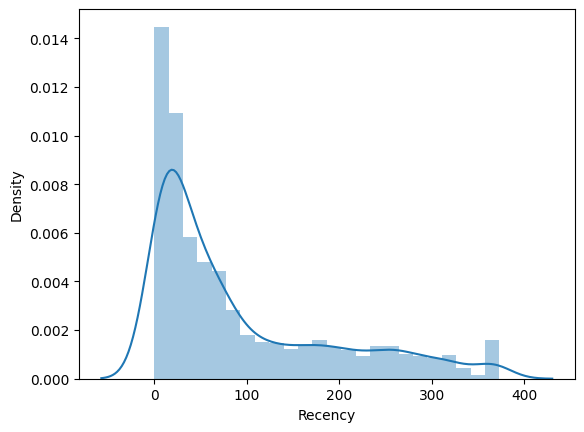

In [29]:
#Recency distribution plot
import seaborn as sns

ax = sns.distplot(RFMScore['Recency'])

In [18]:
#Descriptive statistics (Frequency)

RFMScore['Frequency'].describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

<Axes: xlabel='Frequency', ylabel='Density'>

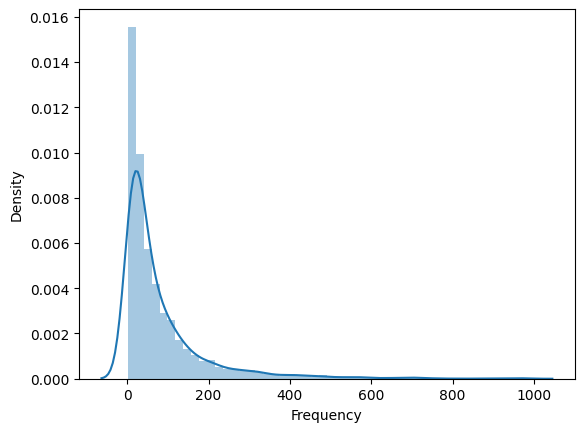

In [30]:
#Frequency distribution plot, taking observations which have frequency less than 1000
sns.distplot(RFMScore.query('Frequency < 1000')['Frequency'])

In [20]:
#Descriptive statistics (Moentary)
RFMScore['Monetary'].describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

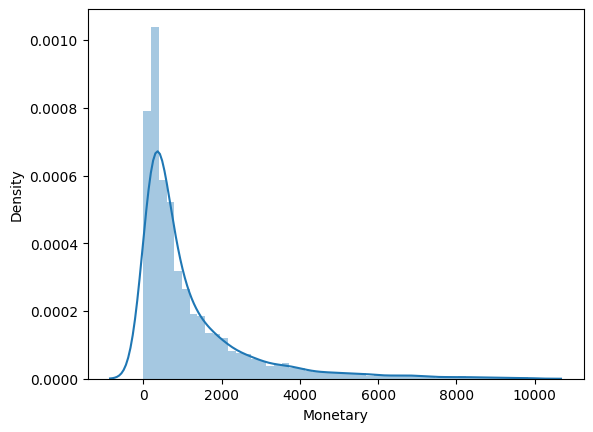

In [31]:
#Plot distribution for monetary, taking observations which have monetary value less than 10000

sns.distplot(RFMScore.query('Monetary<10000')['Monetary'])

In [22]:
#Split into four segments using quantiles

quantiles = RFMScore.quantile([0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [23]:
#Functions to create R F M segments

def RScoring (x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [24]:
#Caluclate Add R F M segment value columns in the existing dataset to show R, F, M segment values

RFMScore['R'] = RFMScore['Recency'].apply(RScoring, args = ('Recency', quantiles,))
RFMScore['F'] = RFMScore['Frequency'].apply(FMScoring, args = ('Frequency', quantiles,))
RFMScore['M'] = RFMScore['Monetary'].apply(FMScoring, args=('Monetary', quantiles, ))
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [25]:
#Calculate and add RFMGroup value column showing combined concatenated score of RFM

RFMScore['RFMGroup'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)

#Calculate and add RFMGroup value column showing total sum score of RFM

RFMScore['RFMScore'] = RFMScore[['R',"F",'M']].sum(axis = 1)
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [26]:
#Assign loyalty level to each customer
Loyalty_level = ['Platinum','Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMScore.RFMScore, q = 4, labels = Loyalty_level)
RFMScore['RFM_Loyalty_Level'] = Score_cuts.values
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [27]:
#Validate data for RFM group = 111

RFMScore[RFMScore['RFMGroup'] == '111'].sort_values('Monetary', ascending = False).reset_index().head(15)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum
